# Question 2: [Multiclass Classification]
Use Keras’ built-in
Reuters dataset (from keras.datasets import reuters) to classify 46
different topics. Use k-fold cross validation and show loss/accuracy
plots by epoch.

Let's start by importing requirements

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import reuters 

Using TensorFlow backend.


Load Reuters dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Prepare the data

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

We need to make one-to-hot encoding for the labels

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Create k-folds using k=5

In [5]:
from sklearn.model_selection import StratifiedKFold

k=5
folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(x_train, train_labels))

Create the model as a function so we can try different number of layers and hidden units

In [6]:
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt

def build_model(num_layers, hidden_units, x_data, y_data, folds, verbose=False):

    history_cr = []

    for j, (train_idx, val_idx) in enumerate(folds):
        X_train_cv = x_data[train_idx]
        Y_train_cv = y_data[train_idx]
        X_valid_cv = x_data[val_idx]
        Y_valid_cv = y_data[val_idx]
        model = Sequential()
        model.add(layers.Dense(64, input_shape=(10000,), activation='relu'))
        for hl in range(num_layers):
            model.add(layers.Dense(hidden_units, activation='relu'))
        model.add(layers.Dense(46, activation='softmax'))
        model.compile(loss='categorical_crossentropy', 
                      optimizer='rmsprop', 
                      metrics=['accuracy'])
        
        history_cr.append(model.fit(X_train_cv, Y_train_cv,
                            epochs=50,
                            verbose=verbose,
                            validation_data=(X_valid_cv, Y_valid_cv),
                            batch_size=50))
    return history_cr


def plot_results(history, folds, source):
    
    acc = []
    val_acc = []
    loss = []
    val_loss = []

    for k,fold in enumerate(folds):
        acc.append(history[k].history['acc'])
        val_acc.append(history[k].history['val_acc'])
        loss.append(history[k].history['loss'])
        val_loss.append(history[k].history['val_loss'])
    
    acc = np.transpose(acc)
    val_acc = np.transpose(val_acc)
    loss = np.transpose(loss)
    val_loss = np.transpose(val_loss)
    
    plt.plot(acc)
    plt.title(source +  ' - model accuracy on training samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_acc)
    plt.title(source +  ' - model accuracy on validation samples')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

    plt.plot(loss)
    plt.title(source + ' - model training loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(val_loss)
    plt.title(source + ' - model validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    
    return acc, val_acc, loss, val_loss

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 7170 samples, validate on 1812 samples
Epoch 1/50
7170/7170 [==============================] - 7s 1ms/step - loss: 1.6335 - acc: 0.6393 - val_loss: 1.2724 - val_acc: 0.7025
Epoch 2/50
7170/7170 [==============================] - 2s 257us/step - loss: 0.8939 - acc: 0.8014 - val_loss: 1.0545 - val_acc: 0.7599
Epoch 3/50
7170/7170 [==============================] - 2s 261us/step - loss: 0.5890 - acc: 0.8653 - val_loss: 0.9906 - val_acc: 0.7765
Epoch 4/50
7170/7170 [==============================] - 2s 264us/step - loss: 0.4012 - acc: 0.9120 - val_loss: 1.0535 - val_acc: 0.7754
Epoch 5/50
7170/7170 [==============================] - 2s 262us/step - loss: 0.2920 - acc: 0.9361 - val_loss: 1.0966 - val_acc: 0.7930
Epoch 6/50
7170/7170 [==============================] - 2s 266us/step - loss: 0.2284 - acc: 0.9495 - val_loss: 1.2000 - val_acc: 0.7837
Epoch 7/50
7170/71

7178/7178 [==============================] - 2s 244us/step - loss: 0.2024 - acc: 0.9528 - val_loss: 1.2070 - val_acc: 0.7639
Epoch 7/50
7178/7178 [==============================] - 2s 249us/step - loss: 0.1773 - acc: 0.9557 - val_loss: 1.2383 - val_acc: 0.7833
Epoch 8/50
7178/7178 [==============================] - 2s 249us/step - loss: 0.1567 - acc: 0.9581 - val_loss: 1.2945 - val_acc: 0.7822
Epoch 9/50
7178/7178 [==============================] - 2s 251us/step - loss: 0.1423 - acc: 0.9590 - val_loss: 1.3330 - val_acc: 0.7877
Epoch 10/50
7178/7178 [==============================] - 2s 248us/step - loss: 0.1341 - acc: 0.9614 - val_loss: 1.3981 - val_acc: 0.7871
Epoch 11/50
7178/7178 [==============================] - 2s 255us/step - loss: 0.1221 - acc: 0.9631 - val_loss: 1.4496 - val_acc: 0.7799
Epoch 12/50
7178/7178 [==============================] - 2s 253us/step - loss: 0.1180 - acc: 0.9625 - val_loss: 1.4570 - val_acc: 0.7722
Epoch 13/50
7178/7178 [==============================] -

7189/7189 [==============================] - 2s 250us/step - loss: 0.0837 - acc: 0.9638 - val_loss: 1.7611 - val_acc: 0.7797
Epoch 25/50
7189/7189 [==============================] - 2s 247us/step - loss: 0.0797 - acc: 0.9655 - val_loss: 1.7975 - val_acc: 0.7842
Epoch 26/50
7189/7189 [==============================] - 2s 238us/step - loss: 0.0794 - acc: 0.9609 - val_loss: 1.8719 - val_acc: 0.7797
Epoch 27/50
7189/7189 [==============================] - 2s 240us/step - loss: 0.0772 - acc: 0.9637 - val_loss: 1.9040 - val_acc: 0.7730
Epoch 28/50
7189/7189 [==============================] - 2s 239us/step - loss: 0.0763 - acc: 0.9651 - val_loss: 1.8452 - val_acc: 0.7819
Epoch 29/50
7189/7189 [==============================] - 2s 244us/step - loss: 0.0741 - acc: 0.9633 - val_loss: 1.9122 - val_acc: 0.7786
Epoch 30/50
7189/7189 [==============================] - 2s 251us/step - loss: 0.0726 - acc: 0.9637 - val_loss: 2.1739 - val_acc: 0.7691
Epoch 31/50
7189/7189 [==============================

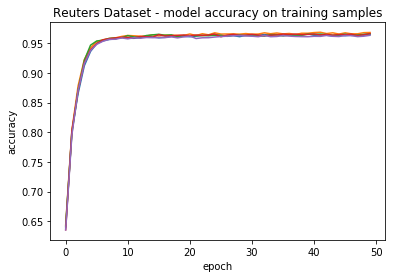

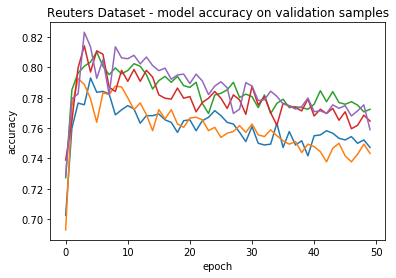

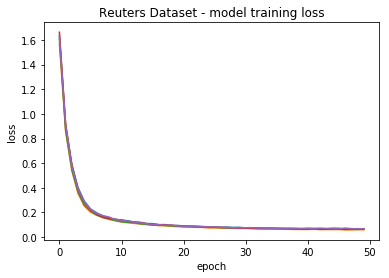

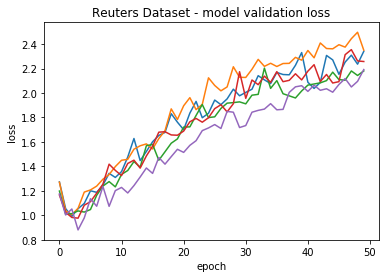

In [7]:
history = build_model(num_layers=2, hidden_units=64, x_data=x_train ,y_data=one_hot_train_labels, folds=folds, verbose=True)
acc, val_acc, loss, val_loss = plot_results(history, folds, 'Reuters Dataset')

This is the result for 4 layers with 64 hidden units. (Plots are at the bottom)

Let's try with 12 layers

Train on 7170 samples, validate on 1812 samples
Epoch 1/50
7170/7170 [==============================] - 3s 440us/step - loss: 1.9240 - acc: 0.4834 - val_loss: 1.5926 - val_acc: 0.5855
Epoch 2/50
7170/7170 [==============================] - 2s 331us/step - loss: 1.3416 - acc: 0.6424 - val_loss: 1.4169 - val_acc: 0.6512
Epoch 3/50
7170/7170 [==============================] - 3s 362us/step - loss: 1.0570 - acc: 0.7259 - val_loss: 1.3632 - val_acc: 0.6722
Epoch 4/50
7170/7170 [==============================] - 3s 356us/step - loss: 0.8238 - acc: 0.7816 - val_loss: 1.3246 - val_acc: 0.7042
Epoch 5/50
7170/7170 [==============================] - 2s 325us/step - loss: 0.6839 - acc: 0.8167 - val_loss: 1.4843 - val_acc: 0.6943
Epoch 6/50
7170/7170 [==============================] - 2s 327us/step - loss: 0.5663 - acc: 0.8449 - val_loss: 1.4282 - val_acc: 0.7312
Epoch 7/50
7170/7170 [==============================] - 2s 327us/step - loss: 0.5004 - acc: 0.8621 - val_loss: 1.5185 - val_acc: 0.7323


7185/7185 [==============================] - 2s 343us/step - loss: 0.2243 - acc: 0.9371 - val_loss: 1.9920 - val_acc: 0.7318
Epoch 20/50
7185/7185 [==============================] - 2s 331us/step - loss: 0.2140 - acc: 0.9392 - val_loss: 2.0690 - val_acc: 0.7535
Epoch 21/50
7185/7185 [==============================] - 2s 320us/step - loss: 0.2047 - acc: 0.9406 - val_loss: 2.3965 - val_acc: 0.7179
Epoch 22/50
7185/7185 [==============================] - 2s 323us/step - loss: 0.2005 - acc: 0.9425 - val_loss: 2.1507 - val_acc: 0.7268
Epoch 23/50
7185/7185 [==============================] - 2s 319us/step - loss: 0.1994 - acc: 0.9463 - val_loss: 2.0910 - val_acc: 0.7557
Epoch 24/50
7185/7185 [==============================] - 2s 336us/step - loss: 0.1931 - acc: 0.9463 - val_loss: 2.1802 - val_acc: 0.7429
Epoch 25/50
7185/7185 [==============================] - 2s 325us/step - loss: 0.1889 - acc: 0.9467 - val_loss: 2.2720 - val_acc: 0.7429
Epoch 26/50
7185/7185 [==============================

7206/7206 [==============================] - 3s 365us/step - loss: 0.1684 - acc: 0.9507 - val_loss: 2.3186 - val_acc: 0.6948
Epoch 38/50
7206/7206 [==============================] - 3s 363us/step - loss: 0.1593 - acc: 0.9507 - val_loss: 2.3305 - val_acc: 0.7145
Epoch 39/50
7206/7206 [==============================] - 3s 366us/step - loss: 0.1559 - acc: 0.9535 - val_loss: 2.2824 - val_acc: 0.7275
Epoch 40/50
7206/7206 [==============================] - 3s 360us/step - loss: 0.1666 - acc: 0.9527 - val_loss: 2.1674 - val_acc: 0.7235
Epoch 41/50
7206/7206 [==============================] - 3s 365us/step - loss: 0.1630 - acc: 0.9509 - val_loss: 2.1770 - val_acc: 0.7185
Epoch 42/50
7206/7206 [==============================] - 3s 363us/step - loss: 0.1720 - acc: 0.9510 - val_loss: 2.4377 - val_acc: 0.7157
Epoch 43/50
7206/7206 [==============================] - 3s 365us/step - loss: 0.1448 - acc: 0.9534 - val_loss: 2.4292 - val_acc: 0.7145
Epoch 44/50
7206/7206 [==============================

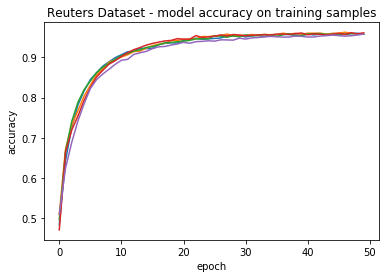

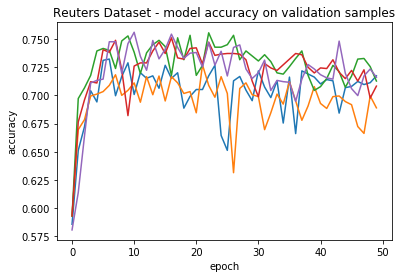

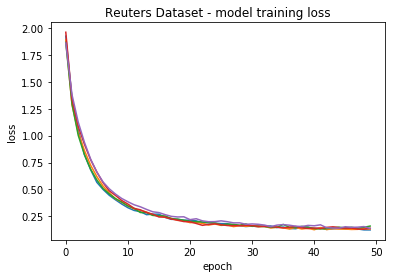

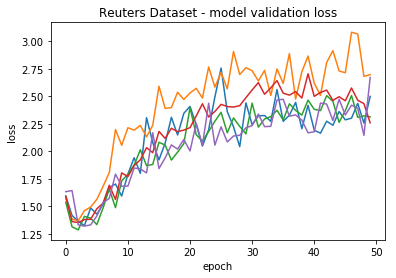

In [8]:
history = build_model(num_layers=10, hidden_units=64, x_data=x_train ,y_data=one_hot_train_labels, folds=folds, verbose=True)
acc, val_acc, loss, val_loss = plot_results(history, folds, 'Reuters Dataset')

Let's increase hidden units to 128 hidden units.

Train on 7170 samples, validate on 1812 samples
Epoch 1/50
7170/7170 [==============================] - 4s 514us/step - loss: 1.9405 - acc: 0.4647 - val_loss: 1.7062 - val_acc: 0.5629
Epoch 2/50
7170/7170 [==============================] - 2s 327us/step - loss: 1.4310 - acc: 0.6146 - val_loss: 1.7918 - val_acc: 0.5817
Epoch 3/50
7170/7170 [==============================] - 3s 360us/step - loss: 1.1155 - acc: 0.7152 - val_loss: 1.5963 - val_acc: 0.6611
Epoch 4/50
7170/7170 [==============================] - 3s 372us/step - loss: 0.9388 - acc: 0.7590 - val_loss: 1.4414 - val_acc: 0.7014
Epoch 5/50
7170/7170 [==============================] - 3s 373us/step - loss: 0.7947 - acc: 0.7927 - val_loss: 1.6227 - val_acc: 0.7036
Epoch 6/50
7170/7170 [==============================] - 3s 368us/step - loss: 0.6818 - acc: 0.8199 - val_loss: 1.3400 - val_acc: 0.7147
Epoch 7/50
7170/7170 [==============================] - 3s 371us/step - loss: 0.5953 - acc: 0.8420 - val_loss: 1.5440 - val_acc: 0.7307


7185/7185 [==============================] - 2s 335us/step - loss: 0.2688 - acc: 0.9264 - val_loss: 2.0475 - val_acc: 0.7496
Epoch 20/50
7185/7185 [==============================] - 2s 314us/step - loss: 0.2481 - acc: 0.9314 - val_loss: 2.0394 - val_acc: 0.7273
Epoch 21/50
7185/7185 [==============================] - 2s 331us/step - loss: 0.2485 - acc: 0.9314 - val_loss: 1.9193 - val_acc: 0.7251
Epoch 22/50
7185/7185 [==============================] - 2s 326us/step - loss: 0.2466 - acc: 0.9349 - val_loss: 2.1710 - val_acc: 0.7234
Epoch 23/50
7185/7185 [==============================] - 2s 320us/step - loss: 0.2318 - acc: 0.9382 - val_loss: 2.0143 - val_acc: 0.7140
Epoch 24/50
7185/7185 [==============================] - 2s 317us/step - loss: 0.2113 - acc: 0.9439 - val_loss: 2.2131 - val_acc: 0.7323
Epoch 25/50
7185/7185 [==============================] - 3s 355us/step - loss: 0.2134 - acc: 0.9438 - val_loss: 2.0942 - val_acc: 0.7323
Epoch 26/50
7185/7185 [==============================

7206/7206 [==============================] - 2s 320us/step - loss: 0.1860 - acc: 0.9530 - val_loss: 1.9634 - val_acc: 0.7325
Epoch 38/50
7206/7206 [==============================] - 2s 319us/step - loss: 0.1664 - acc: 0.9545 - val_loss: 1.9387 - val_acc: 0.7466
Epoch 39/50
7206/7206 [==============================] - 2s 317us/step - loss: 0.1686 - acc: 0.9564 - val_loss: 2.0220 - val_acc: 0.7387
Epoch 40/50
7206/7206 [==============================] - 2s 319us/step - loss: 0.1887 - acc: 0.9552 - val_loss: 2.1378 - val_acc: 0.7264
Epoch 41/50
7206/7206 [==============================] - 2s 325us/step - loss: 0.1765 - acc: 0.9532 - val_loss: 2.1105 - val_acc: 0.7247
Epoch 42/50
7206/7206 [==============================] - 2s 319us/step - loss: 0.1650 - acc: 0.9557 - val_loss: 1.9099 - val_acc: 0.7241
Epoch 43/50
7206/7206 [==============================] - 2s 318us/step - loss: 0.1602 - acc: 0.9543 - val_loss: 2.1460 - val_acc: 0.7275
Epoch 44/50
7206/7206 [==============================

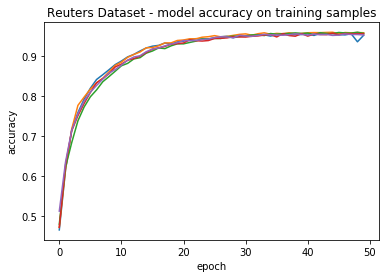

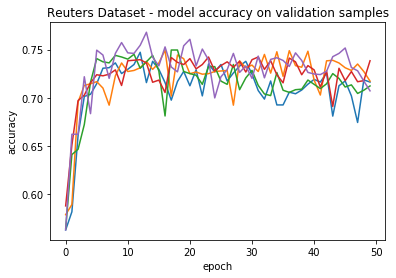

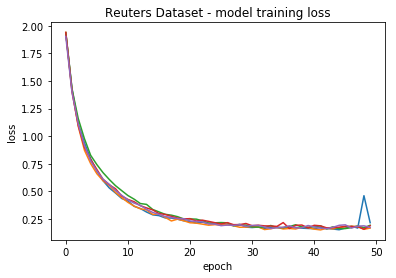

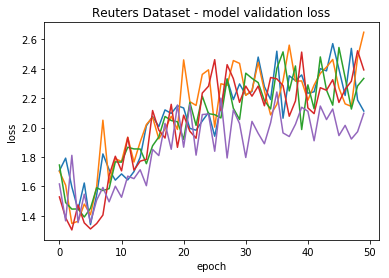

In [9]:
history = build_model(num_layers=10, hidden_units=128, x_data=x_train ,y_data=one_hot_train_labels, folds=folds, verbose=True)
acc, val_acc, loss, val_loss = plot_results(history, folds, 'Reuters Dataset')

Let's decrease the number of hidden units in the middle layers to 8

Decreasing it lower than 46 will result in information loss...

Train on 7170 samples, validate on 1812 samples
Epoch 1/50
7170/7170 [==============================] - 4s 544us/step - loss: 2.6259 - acc: 0.2734 - val_loss: 2.0412 - val_acc: 0.3510
Epoch 2/50
7170/7170 [==============================] - 2s 331us/step - loss: 1.8485 - acc: 0.4667 - val_loss: 1.8683 - val_acc: 0.5166
Epoch 3/50
7170/7170 [==============================] - 2s 331us/step - loss: 1.6308 - acc: 0.5386 - val_loss: 1.7807 - val_acc: 0.5287
Epoch 4/50
7170/7170 [==============================] - 2s 326us/step - loss: 1.5125 - acc: 0.5474 - val_loss: 1.8408 - val_acc: 0.5287
Epoch 5/50
7170/7170 [==============================] - 2s 328us/step - loss: 1.4379 - acc: 0.5660 - val_loss: 1.7848 - val_acc: 0.5535
Epoch 6/50
7170/7170 [==============================] - 2s 324us/step - loss: 1.3683 - acc: 0.6056 - val_loss: 1.8267 - val_acc: 0.5745
Epoch 7/50
7170/7170 [==============================] - 2s 324us/step - loss: 1.3120 - acc: 0.6317 - val_loss: 1.8435 - val_acc: 0.5712


7185/7185 [==============================] - 3s 382us/step - loss: 0.9756 - acc: 0.7244 - val_loss: 2.2383 - val_acc: 0.6138
Epoch 20/50
7185/7185 [==============================] - 2s 339us/step - loss: 0.9583 - acc: 0.7324 - val_loss: 2.2907 - val_acc: 0.5871
Epoch 21/50
7185/7185 [==============================] - 2s 321us/step - loss: 0.9453 - acc: 0.7447 - val_loss: 2.3876 - val_acc: 0.5470
Epoch 22/50
7185/7185 [==============================] - 2s 324us/step - loss: 0.9152 - acc: 0.7556 - val_loss: 2.2998 - val_acc: 0.6043
Epoch 23/50
7185/7185 [==============================] - 2s 327us/step - loss: 0.8887 - acc: 0.7612 - val_loss: 2.2805 - val_acc: 0.5943
Epoch 24/50
7185/7185 [==============================] - 2s 329us/step - loss: 0.8611 - acc: 0.7680 - val_loss: 2.4566 - val_acc: 0.5826
Epoch 25/50
7185/7185 [==============================] - 2s 328us/step - loss: 0.8496 - acc: 0.7672 - val_loss: 2.3906 - val_acc: 0.6016
Epoch 26/50
7185/7185 [==============================

7206/7206 [==============================] - 3s 381us/step - loss: 0.6252 - acc: 0.8562 - val_loss: 2.5667 - val_acc: 0.6098
Epoch 38/50
7206/7206 [==============================] - 3s 383us/step - loss: 0.6117 - acc: 0.8597 - val_loss: 2.5958 - val_acc: 0.6509
Epoch 39/50
7206/7206 [==============================] - 3s 380us/step - loss: 0.6083 - acc: 0.8603 - val_loss: 2.6048 - val_acc: 0.6216
Epoch 40/50
7206/7206 [==============================] - 3s 379us/step - loss: 0.5856 - acc: 0.8648 - val_loss: 2.5458 - val_acc: 0.6408
Epoch 41/50
7206/7206 [==============================] - 3s 382us/step - loss: 0.5752 - acc: 0.8694 - val_loss: 2.7558 - val_acc: 0.6199
Epoch 42/50
7206/7206 [==============================] - 3s 376us/step - loss: 0.5649 - acc: 0.8694 - val_loss: 2.5749 - val_acc: 0.6571
Epoch 43/50
7206/7206 [==============================] - 3s 380us/step - loss: 0.5532 - acc: 0.8730 - val_loss: 2.6330 - val_acc: 0.6413
Epoch 44/50
7206/7206 [==============================

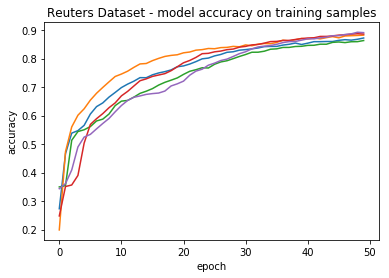

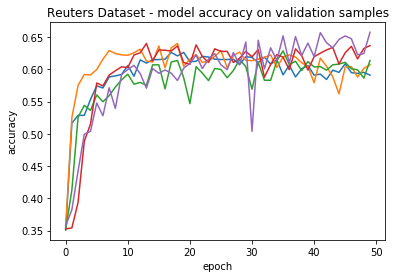

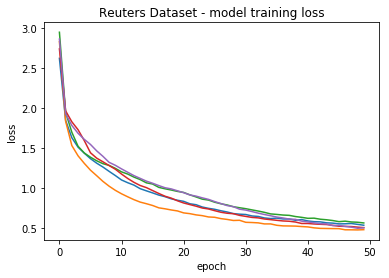

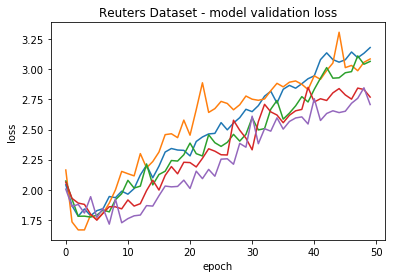

In [10]:
history = build_model(num_layers=10, hidden_units=8, x_data=x_train ,y_data=one_hot_train_labels, folds=folds, verbose=True)
acc, val_acc, loss, val_loss = plot_results(history, folds, 'Reuters Dataset')